## Problem Statement 1: Load the 'Breast_Cancer_Dataset.csv' dataset into a DataFrame and
perform the following tasks:

1. Identify the null values and remove the null rows and columns by using the dropna() function

2. Encode the 'diagnosis' column using the LabelEncoder()

3. Considering the 'diagnosis' column as the target, separate the target variable and the feature vectors

4. Split the dataset into the training set and test set in a 70:30 ratio

5. Building a Logistic Regression, Naive Bayes, Decision Tree (CART), K-NN, SVM, and RandomForestClassifier models; Also print their accuracies

6. Calculate and plot the confusion matrix

In [1]:
# 1. Identify the null values and remove the null rows and columns by using the dropna() function

import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split
from sklearn import metrics 

data1 =pd.read_csv("Assignment 6 - Dataset/Breast_Cancer_Dataset.csv")
df = data1.copy()
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [3]:
df.drop("Unnamed: 32", axis=1, inplace=True)
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
# 2. Encode the 'diagnosis' column using the LabelEncoder()

Label_Encoder = preprocessing.LabelEncoder()
df.diagnosis = Label_Encoder.fit_transform(df['diagnosis'])
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
# 3. Considering the 'diagnosis' column as the target, separate the target variable and the feature vectors

x = df.drop(["diagnosis"], axis=1) # Features
y = df["diagnosis"] # Target variable
x.shape, y.shape



((569, 31), (569,))

In [6]:
# 4. Split the dataset into the training set and test set in a 70:30 ratio

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((398, 31), (171, 31), (398,), (171,))

In [7]:
# 5. Building a Logistic Regression, Naive Bayes, Decision Tree (CART), K-NN, SVM, and RandomForestClassifier models; Also print their accuracies

from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings("ignore")

models = [GaussianNB(), LogisticRegression(), KNeighborsClassifier(), SVC(), DecisionTreeClassifier(), RandomForestClassifier()]

for i in models:
    mod = i.fit(x_train, y_train)
    y_pred = mod.predict(x_test)
    print( str(i)[:-2],":",accuracy_score(y_test, y_pred))

GaussianNB : 0.631578947368421
LogisticRegression : 0.631578947368421
KNeighborsClassifier : 0.7660818713450293
SVC : 0.631578947368421
DecisionTreeClassifier : 0.935672514619883
RandomForestClassifier : 0.9532163742690059


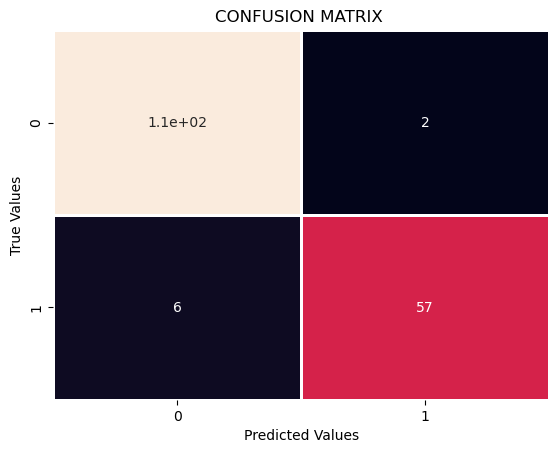

In [8]:
# 6. Calculate and plot the confusion matrix

from sklearn.metrics import confusion_matrix

sns.heatmap(confusion_matrix(y_test, y_pred),annot=True,lw =2,cbar=False)
plt.ylabel("True Values")
plt.xlabel("Predicted Values")
plt.title("CONFUSION MATRIX ")
plt.show()

## Problem Statement 2: Load the 'Breast_Cancer_Dataset.csv' dataset into a DataFrame and
perform the following tasks:
    
1. Identify the null values and remove the null rows and columns by using the dropna() function

2. Considering the 'diagnosis' column as the target, encode the 'diagnosis' column using the LabelEncoder()

3. Separate the target variable and the feature vectors

4. Split the dataset into the training set and test set in a 70:30 ratio
    
5. Building a Logistic Regression, Naive Bayes, Decision Tree (CART), K-NN, SVM, and RandomForestClassifier models; Also, print their accuracies

6. Calculate the ROC_AUC score based on the False Positive Rate (FPR) and True Positive Rate (TPR)

7. Plot the ROC Curve using the Matplotlib library

8. Calculate the F1 Score

9. Calculate and Print the Precision, Recall, and F1 score using the classification_report() function


In [10]:
# <!-- 1. Identify the null values and remove the null rows and columns by using the dropna() function -->

data2 =pd.read_csv("Assignment 6 - Dataset/Breast_Cancer_Dataset.csv")
df2 = data1.copy()
df2.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [11]:
df2.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [12]:
df2 = df2.iloc[: , :-1]
df2.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [14]:
# 2. Considering the 'diagnosis' column as the target, encode the 'diagnosis' column using the LabelEncoder()

lebel = preprocessing.LabelEncoder()
df2["diagnosis"] = lebel.fit_transform(df['diagnosis'])
df2["diagnosis"].head()

0    1
1    1
2    1
3    1
4    1
Name: diagnosis, dtype: int64

In [15]:
# 3. Separate the target variable and the feature vectors

X = df.drop(["diagnosis"], axis=1) 
y = df["diagnosis"]

In [16]:
# 4. Split the dataset into the training set and test set in a 70:30 ratio

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10) 

In [18]:
# 5. Building a Logistic Regression, Naive Bayes, Decision Tree (CART), K-NN, SVM, and RandomForestClassifier models; Also, print their accuracies

from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

models = []
models.append(('Logistic Regression', LogisticRegression()))
models.append(('Naive Bayes', GaussianNB()))
models.append(('Decision Tree (CART)',DecisionTreeClassifier())) 
models.append(('K-NN', KNeighborsClassifier()))
models.append(('SVM', SVC()))
models.append(('RandomForestClassifier', RandomForestClassifier()))

In [20]:
for name, model in models:
    model = model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    

    print("%s  ACC: %%%.2f" % (name,metrics.accuracy_score(y_test, y_pred)*100))

Logistic Regression  ACC: %34.50
Naive Bayes  ACC: %64.33
Decision Tree (CART)  ACC: %92.98
K-NN  ACC: %72.51
SVM  ACC: %59.06
RandomForestClassifier  ACC: %97.66


In [21]:
# 6. Calculate the ROC_AUC score based on the False Positive Rate (FPR) and True Positive Rate (TPR)

import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = model.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
print("roc_auc score is:")
roc_auc



roc_auc score is:


0.9781325665859564

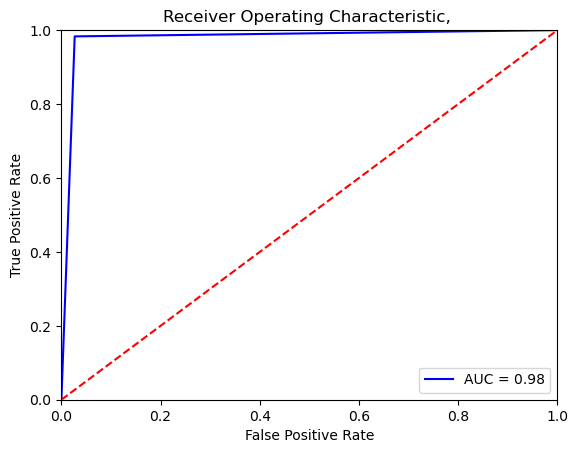

In [22]:
# 7. Plot the ROC Curve using the Matplotlib library

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic, ')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [23]:
# 8. Calculate the F1 Score

from sklearn.metrics import f1_score
print("F1 score is:")
f1_score(y_test,y_pred)

F1 score is:


0.9666666666666667

In [24]:
# 9. Calculate and Print the Precision, Recall, and F1 score using the classification_report() function
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.99      0.97      0.98       112
           1       0.95      0.98      0.97        59

    accuracy                           0.98       171
   macro avg       0.97      0.98      0.97       171
weighted avg       0.98      0.98      0.98       171



## Problem Statement 3: Load the ‘voice.csv’ dataset into a DataFrame and perform the following tasks:

1. Considering the ‘label’ column as the target variable, rename the column as ‘Gender_Identified’

2. Using the preprocessing() function, label the target column

3. Separate the target variable and the feature vectors

4. Build a RandomForestClassifier model and find the best parameters using a Grid search

5. Print the best parameters and the best estimator

In [25]:
data3 =pd.read_csv('Assignment 6 - Dataset/voice.csv')
data3.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [26]:
# 1. Considering the ‘label’ column as the target variable, rename the column as ‘Gender_Identified’

data3.rename(columns = {'label':'Gender_Identified'}, inplace = True)
data3.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,Gender_Identified
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [28]:
# 2. Using the preprocessing() function, label the target column

lebel2 = preprocessing.LabelEncoder()
data3.Gender_Identified = lebel2.fit_transform(data3['Gender_Identified'])



In [29]:
# 3. Separate the target variable and the feature vectors

X=data3.drop(['Gender_Identified'],axis=1)
y=data3.Gender_Identified


In [31]:
# 4. Build a RandomForestClassifier model and find the best parameters using a Grid search

from sklearn.model_selection import GridSearchCV

params = { "criterion" : ["gini", "entropy"], "n_estimators": [100, 150, 200, 300]}
rf_gsv=GridSearchCV(estimator=RandomForestClassifier(),param_grid=params,cv=3,scoring='accuracy')
rf_gsv.fit(X,y)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'n_estimators': [100, 150, 200, 300]},
             scoring='accuracy')

In [32]:
pd.DataFrame(rf_gsv.cv_results_).sort_values('rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
4,0.406541,0.028560,0.012842,0.000226,entropy,100,"{'criterion': 'entropy', 'n_estimators': 100}",0.947917,0.982955,0.968750,0.966540,0.014389,1
5,0.576988,0.023529,0.017710,0.001016,entropy,150,"{'criterion': 'entropy', 'n_estimators': 150}",0.945076,0.982008,0.970644,0.965909,0.015445,2
2,0.652290,0.026347,0.022679,0.001238,gini,200,"{'criterion': 'gini', 'n_estimators': 200}",0.942235,0.982008,0.972538,0.965593,0.016963,3
7,1.158090,0.077365,0.032534,0.000670,entropy,300,"{'criterion': 'entropy', 'n_estimators': 300}",0.945076,0.982008,0.969697,0.965593,0.015354,3
3,1.014260,0.038682,0.033886,0.001602,gini,300,"{'criterion': 'gini', 'n_estimators': 300}",0.943182,0.981061,0.970644,0.964962,0.015977,5
6,0.769510,0.048468,0.022356,0.000461,entropy,200,"{'criterion': 'entropy', 'n_estimators': 200}",0.944129,0.981061,0.969697,0.964962,0.015445,5
0,0.325087,0.010108,0.012670,0.000472,gini,100,"{'criterion': 'gini', 'n_estimators': 100}",0.940341,0.982008,0.971591,0.964646,0.017705,7
1,0.492311,0.023401,0.018506,0.000408,gini,150,"{'criterion': 'gini', 'n_estimators': 150}",0.940341,0.981061,0.971591,0.964331,0.017398,8


In [33]:
# 5. Print the best parameters and the best estimator

rf_gsv.best_params_

{'criterion': 'entropy', 'n_estimators': 100}

## Problem Statement 4: The ‘seeds.csv’ dataset contains the data about the wheat seeds, the‘Type’ column consisit of three unique values, 1, 2, 3, which are classified based on thecharecterstics of seeds entailing in other columns.

Load the ‘seeds.csv’ dataset into a DataFrame and perform the following tasks:

1. Considering the 'Type' column as target, analyze the target column by printing the unique values

2. Separate the feature vectors and the target variable

3. Split the dataset into train and test sets in a 70:30 ratio

4. Build a Decision Tree Classifier and a GaussianNB model and print their accuracy scores

5. For the Decision Tree Classifier and a GaussianNB models boost the accuracy using ADA
Boost Classifier and compare the accuracy scores with original models using a bar plot

In [34]:
data4 =pd.read_csv('Assignment 6 - Dataset/seeds.csv')
data4.head()

,Area,Perimeter,Compactness,Kernel.Length,Kernel.Width,Asymmetry.Coeff,Kernel.Groove,Type
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


In [35]:
# 1. Considering the 'Type' column as target, analyze the target column by printing the unique values
data4.Type.unique()


array([1, 2, 3], dtype=int64)

In [36]:
target_ratio=pd.DataFrame({'Counts':data4.Type.value_counts(),'Percentage':data4.Type.value_counts()/len(data4)})
target_ratio

,Counts,Percentage
2,68,0.341709
1,66,0.331658
3,65,0.326633


In [37]:
# 2. Separate the feature vectors and the target variable

X=data4.drop(['Type'],axis=1)
y=data4.Type

# 3. Split the dataset into train and test sets in a 70:30 ratio

X_train, X_test, y_train, y_test=train_test_split(X,y,random_state=10,test_size=0.3)

In [38]:
# 4. Build a Decision Tree Classifier and a GaussianNB model and print their accuracy scores

dt_clf=DecisionTreeClassifier(max_depth=1)
dt_clf.fit(X_train,y_train)
dt_pred=dt_clf.predict(X_test)
acc_dt=round(accuracy_score(y_test,dt_pred),3)
print("Accuracy score of the Decision tree model is:")
print(acc_dt)

Accuracy score of the Decision tree model is:
0.6


In [39]:
gnb_model=GaussianNB()
gnb_model.fit(X_train,y_train)
gnb_pred=gnb_model.predict(X_test)
acc_gnb=round(accuracy_score(y_test,gnb_pred),3)
print("Accuracy score of the GaussianNB model is:")
print(acc_gnb)

Accuracy score of the GaussianNB model is:
0.917


In [40]:
# 5. For the Decision Tree Classifier and a GaussianNB models boost the accuracy using ADA
# Boost Classifier and compare the accuracy scores with original models using a bar plot

from sklearn.ensemble import AdaBoostClassifier
ada=AdaBoostClassifier(n_estimators=100,learning_rate=0.6)
ada.fit(X_train,y_train)
ada_pred=ada.predict(X_test)
acc_ada=round(accuracy_score(y_test,ada_pred),3)
print(acc_ada)

0.85


In [41]:
ada_gnb=AdaBoostClassifier(base_estimator=GaussianNB(),n_estimators=100,learning_rate=0.5)
ada_gnb.fit(X_train,y_train)
agnb_pred=ada_gnb.predict(X_test)
acc_agnb=round(accuracy_score(y_test,agnb_pred),3)
print(acc_agnb)

0.917


<BarContainer object of 4 artists>

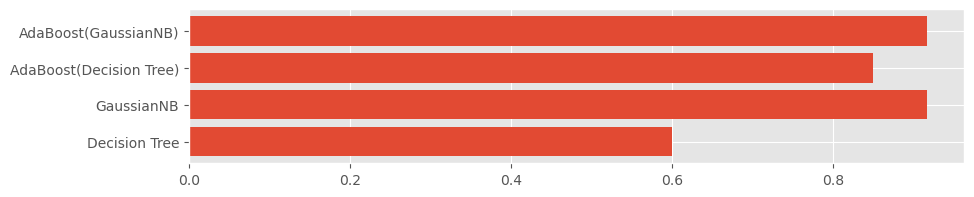

In [44]:
plt.style.use("ggplot")
plt.figure(figsize=(10,2))
plt.barh(np.arange(4),[acc_dt,acc_gnb,acc_ada,acc_agnb],\
         tick_label=['Decision Tree','GaussianNB','AdaBoost(Decision Tree)','AdaBoost(GaussianNB)'])